# **Lab 6: Differential Equations**
**Kevin Arnmark**

# **Abstract**

In this report I implement time stepping methods for scalar initial value problem $du/dt = f(u,t)$ and system of initial value problems. The specific method I use is the $\theta$-metod and I test this method for both accuracy and stability.

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [1]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2021 Kevin Arnmark (karnmark@kth.se)

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.


'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [2]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np
import random

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**

I will implement the following functions:

1.   
  **Function:** Time stepping for scalar initial value problem $du/dt = f(u,t)$

  **Input:** final time T, function $f(u,t)$, initial value $u(0)$

  **Output:** approximation $U(t_n)$ for the time interval $[0,T]$ 

  **Test:** verify accuracy and stability with respect to model problem.

2.  
  **Function:** Time stepping for a system of  initial value problems $du/dt = f(u,t)$

  **Input:** final time T, function $f(u,t)$, initial value $u(0)$

  **Output: **approximation $U(t_n)$ for the time interval $[0,T]$ 

  **Test:** verify accuracy and stability with respect to model problem.  

The scalar inital value problem is defined as:

$\dot{u}(t) = f(u(t), t), \ \ 0 < t \leq T, u(0) = u_0$, where $u$ is a scalar function defined on the interval $I = [0, T]$

By interpolation over each subinterval, or time step, $I_n = [t_{n-1}, t_n]$ it is possible to construct an approximation $U(t)$ for any $t \in [0, T]$. This is the basics of a time step function. 

Both of these methods are based on the fundamental theorem of calculus which in this problem, for each subinterval $I_n = [t_{n-1}, t_n]$ can be defined as:

$u(t_n) = u(t_{n-1}) + \int^{t_n}_{t_{n-1}} f(u(t), t) \ dt$.

Which is why it is also possible to use quadrature rules to construct an approximation.



# **Method**

**Time stepping for scalar initial value problem $du/dt = f(u,t)$**

There are several different methods that can be used for this. I choose to implement the $\theta$-method because it combines three of the methods into one algorithm. For $\theta = 0$ the result is the same as an explicit Euler method, for $\theta = 1$ the implicit euler method, and for $\theta = 0.5$ the trapezoidal method. The algorithm is based on algorithm 13.3 in chapter 13.2. The newtons method used was made in lab 3.

In [3]:
def theta_method(f, u0, t0, T, k, theta):
  #Input: function f, initial data u0, theta, final time T, time step k.
  #Output: approximation at final time u.
  t = t0
  while t<T:
    f2 = lambda u: u-u0-k*((1-theta)*f(u, t) + theta*f(u0, t))
    u = newtons_method(f2, u0)
    u0 = u
    t += k
  return u

def newtons_method(fnc, x0):
  x = x0
  tol = 1e-7
  h = 1e-7 # small number
  while np.abs(fnc(x)) > tol:
    df = (fnc(x + h) - fnc(x)) / h
    x -= fnc(x)/df
  return x

def euler_explicit(f, u0, t0, T, k): # Only used for testing, not used in the rest of the report
  t = t0
  while t<T:
    u = u0 + k*f(u0,t)
    u0 = u
    t += k
  return u

**Time stepping for a system of initial value problems $du/dt = f(u,t)$**

The timestepping methods are analogous to the scalar initial value problem. The only thing that is different in this method is how I check the tolerance in newtons method. By using numpy arrays I do not need to change the arithmetic at all since it is already implemented.

In [4]:
def theta_method_system(f, u0, t0, T, k, theta):
  #Input: function f, initial data u0, theta, final time T, time step k.
  #Output: approximation at final time u.
  t = t0
  while t<T:
    f2 = lambda u: u-u0-k*((1-theta)*f(u, t) + theta*f(u0, t))
    u = newtons_method_system(f2, u0)
    u0 = u
    t += k
  return u

def newtons_method_system(f, x0):
  #Input: a function f, and an initial guess x0.
  #Output: an approximate root x:
  x = x0
  tol = 1e-7
  h = 1e-7 # small number
  while np.all(np.abs(f(x)) > tol):
    df = (np.subtract(f(x + h),f(x))) / h
    x = x - (f(x) / df)
  return x

# **Results**

Linear model problem: $\dot{u}(t) + \lambda u(t) = g(t), u(0) = u_0,$. Interested in the stability of equilibrium points $u^*$, defined by the condition that $f(u^*, t) = 0$. 

The equilibrium point is stable if $\lambda > 0$ and unstable if $\lambda < 0$. If $\lambda = 0$, then we have a new equilibrium point at $u^* + \epsilon$.

For the time stepping methods, the convention is to use the following stable linear model problem, to analyze the stability.
$\dot{u}(t) = \lambda u(t) , u(0) = 1$,
with solution $u(t) = exp(\lambda t)$

For the explicit Euler method ($\theta = 1$), the following condition on $k\lambda$ must hold for it to be A-stable:

$\lvert -1 - k\lambda \rvert < 1$.

For the implicit Euler method ($\theta = 0$), the following condition on $k\lambda$ must hold for it to be A-stable:

$\lvert 1 - k\lambda \rvert > 1$.

For the trapezoidal method ($\theta = 0.5$), the following condition on $k\lambda$ must hold for it to be A-stable:

$\lvert \frac{1+0.5k\lambda}{1-0.5k\lambda} \rvert < 1 \iff \textbf{Re}(0.5k\lambda) < 0 $

Since the implicit euler method and the trapezoidal method are unconditionally stable when $\lambda < 0$, I can only show that with any k they will converge towards the correct value. For the explicit euler method I will show both how it can be stable and unstable by choosing $k$ so the condition holds or not.

For the stability of the systems, it all boils down to the eignevalues of a matrix $A$. $f(u(t), t) = −Au(t)$, with $A \in R^{N \times N}$ that is a nonsingular matrix. If the eigenvalues $\lambda_i \in C$ of the matrix A has a negative real part, the perturbation will grow exponentially. I try to demonstrate this by creating functions that makes matrix A have a negative real part.


coeff =  -0.6659467563508744


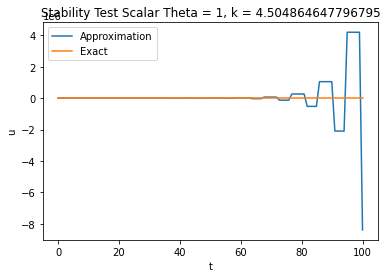

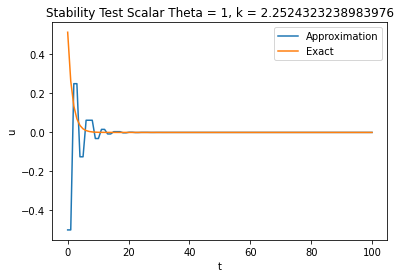

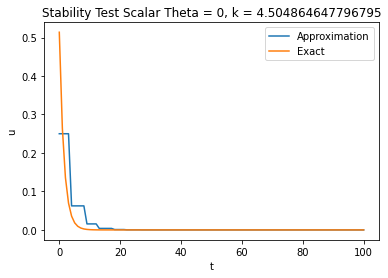

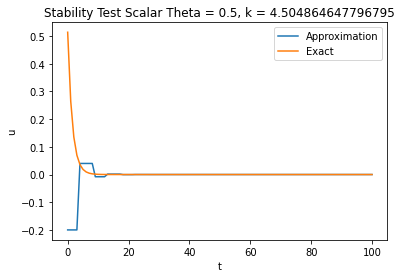

coeff =  [-0.53082596 -0.5422594 ]


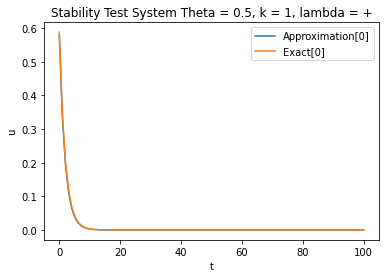

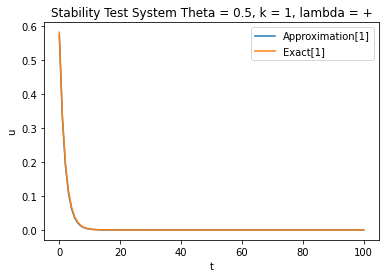

coeff =  [0.75694593 0.03220734]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in subtract
  


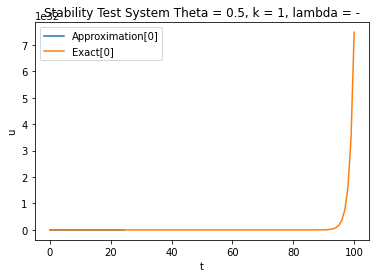

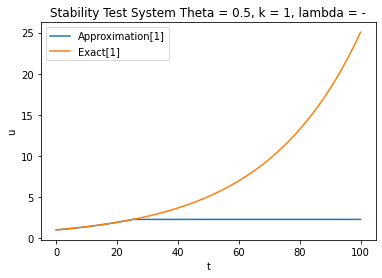

In [6]:
def fnc1(coeff): # Generates a function f for the scalar IVP
  def f(u, t):
    return coeff*u
  return f

def fnc2(coeff): # Genereates 2 linear functions for the systems IVP
  def f(u, t):
    return np.array([coeff[0]*u[0], coeff[1]*u[1]])
  return f

def stability_test(n): # Using the linear model problem 
  coeff = -random.random()
  print("coeff = ", coeff)
  # Explicit Euler where k is picked to make it unstable
  graph(n, abs(3/coeff), coeff, 1)
  # Explicit Euler where k is picked to be stable
  graph(n, abs(1.5/coeff), coeff, 1)

  # Testing with the k that made the Explicit Euler unstable
  graph(n, abs(3/coeff), coeff, 0)
  graph(n, abs(3/coeff), coeff, 0.5)

def stability_test2(n): # Using the linear model problem 
  coeff = np.array([-random.random() for _ in range(2)])
  print("coeff = ", coeff)
  A = np.diag(-coeff) # A has positive eigenvalues and is therefore stable
  graph2(n, 1, coeff, 0.5, "Stability Test System Theta = %s, k = %s, lambda = +"%(0.5, 1))

  coeff = np.array([random.random() for _ in range(2)])
  print("coeff = ", coeff)
  A = np.diag(coeff) # -A has negative eigenvalues and will therefore grow exponentially
  graph2(n, 1, coeff, 0.5, "Stability Test System Theta = %s, k = %s, lambda = -"%(0.5, 1))

def graph(n, k, coeff, theta):
  x = np.linspace(0, n, n)
  y1 = []
  y2 = []
  for t in range(1, n+1):
    y1.append(theta_method(fnc1(coeff), 1, 0, t, k, theta))
    y2.append(np.exp(coeff*t))
  plt.title("Stability Test Scalar Theta = %s, k = %s"%(theta, k))
  plt.xlabel("t")
  plt.ylabel("u")
  plt.plot(x, y1, label="Approximation")
  plt.plot(x, y2, label="Exact")
  plt.legend()
  plt.show()

def graph2(n, k, coeff, theta, title):
  x = np.linspace(0, n, n)
  y11, y12, y21, y22 = [], [], [], []
  for t in range(1, n+1):
    y1 = theta_method_system(fnc2(coeff), np.array([1, 1]), 0, t, k, theta)
    y11.append(y1[0])
    y12.append(y1[1])
    y2 = np.exp(coeff*t)
    y21.append(y2[0])
    y22.append(y2[1])
  plt.title(title)
  plt.xlabel("t")
  plt.ylabel("u")
  plt.plot(x, y11, label="Approximation[0]")
  plt.plot(x, y21, label="Exact[0]")
  plt.legend()
  plt.show()
  plt.title(title)
  plt.xlabel("t")
  plt.ylabel("u")
  plt.plot(x, y12, label="Approximation[1]")
  plt.plot(x, y22, label="Exact[1]")
  plt.legend()
  plt.show()

#Verifying accuracy by testing with u(t) = exp(coeff_0*t), T = 1
coeff = random.randrange(-100, -1)
np.testing.assert_almost_equal(theta_method(fnc1(coeff), 1, 0, 1, 0.001, 0.5), np.exp(coeff), decimal=4)
np.testing.assert_almost_equal(theta_method(fnc1(coeff), 1, 0, 1, 0.001, 0), np.exp(coeff), decimal=4)
np.testing.assert_almost_equal(theta_method(fnc1(coeff), 1, 0, 1, 0.001, 1), np.exp(coeff), decimal=4)

#Testing the stability of the approximation
stability_test(100)

#Verifying accuracy by testing with u(t) = [exp(coeff_0*t), exp(coeff_1*t)], T = 1
coeff2 = [random.randrange(-100, -1) for _ in range(2)]
np.testing.assert_almost_equal(theta_method_system(fnc2(coeff2), np.array([1, 1]), 0, 1, 0.001, 0.5), np.array([np.exp(coeff2[0]), np.exp(coeff2[1])]), decimal=2)
np.testing.assert_almost_equal(theta_method_system(fnc2(coeff2), np.array([1, 1]), 0, 1, 0.001, 0), np.array([np.exp(coeff2[0]), np.exp(coeff2[1])]), decimal=3)
np.testing.assert_almost_equal(theta_method_system(fnc2(coeff2), np.array([1, 1]), 0, 1, 0.001, 1), np.array([np.exp(coeff2[0]), np.exp(coeff2[1])]), decimal=3)

#Testing the stability of the approximation
stability_test2(100)


# **Discussion**

There is a clear instability when picking a certain value of k for the explicit Euler method in the scalar IVP. You can see that instead of converging towards the correct value when t increases, it diverges.

The systems of IVPs stability test does not behave as I think it should. Unfortunately ran out of time to look into this further.

The scalar time stepping function seems to be accurate to at least 4 decimals when k is 0.001 and using any of the methods. The systems time stepping function is for some reason not as exact and can only be within 2 decimals of precision. I am assuming there is some bug or precision problems in this function. I can otherwise not think of why it would be different to the scalar function.

I was also a bit unsure if I was supposed to do this for both linear and nonlinear functions. I have therefore not tested for both.
